![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
# Regression
![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing data
lungs = pd.read_csv('E:\machine_learning_projects\Statistics for Data Science\Regression\LungDisease.csv')
pefr = lungs.PEFR
exposure = lungs.iloc[:,1].values.reshape(-1,1)
pefr.shape, exposure.shape

((122,), (122, 1))

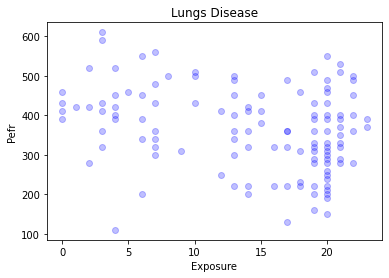

In [3]:
# plotting the data
fig, ax = plt.subplots()

ax.scatter(exposure, pefr, color = 'blue', alpha = 0.25)
ax.set_xlabel("Exposure")
ax.set_ylabel("Pefr")
ax.set_title('Lungs Disease')

plt.show()



In [4]:
#Model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(exposure, pefr)

LinearRegression()

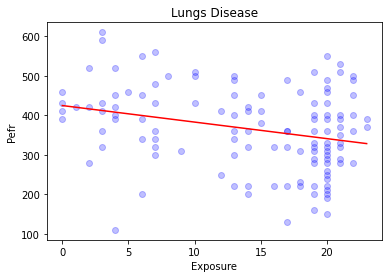

In [5]:
## plotting with fitted line
fig, ax = plt.subplots()

ax.scatter(exposure, pefr, color = 'blue', alpha = 0.25)
ax.plot(exposure, model.predict(exposure), color = 'red')
ax.set_xlabel("Exposure")
ax.set_ylabel("Pefr")
ax.set_title('Lungs Disease')

plt.show()

In [6]:
# Fitted (predicted) values  and Residuals
fitted = model.predict(exposure)
residuals = fitted - pefr
residuals


0       34.582807
1       14.582807
2       -5.417193
3      -35.417193
4        0.398230
          ...    
117   -117.477876
118   -157.477876
119   -167.477876
120    -41.662453
121    -61.662453
Name: PEFR, Length: 122, dtype: float64

# Prediction Versus Explanation (Proling)
![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Historically, a primary use of regression was to illuminate a supposed linear relation ship between predictor variables and an outcome variable. The goal has been to understand a relationship and explain it using the data that the regression was fit to. In this case, the primary focus is on the estimated slope of the regression equation, b. Economists want to know the relationship between consumer spending and GDP growth. Public health officials might want to understand whether a public informa‐ tion campaign is effective in promoting safe sex practices. In such cases, the focus is not on predicting individual cases but rather on understanding the overall relation‐ ship among variables. With the advent of big data, regression is widely used to form a model to predict indi‐ vidual outcomes for new data (i.e., a predictive model) rather than explain data in hand. In this instance, the main items of interest are the fitted values Y. In marketing, regression can be used to predict the change in revenue in response to the size of an ad campaign. Universities use regression to predict students’ GPA based on their SAT scores.


# Key Terms for Multiple Linear Regression
![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
# Root mean squared error
## The square root of the average squared error of the regression (this is the most
## widely used metric to compare regression models).
## Synonym
## RMSE
# Residual standard error
## The same as the root mean squared error, but adjusted for degrees of freedom.
# R-squared
## The proportion of variance explained by the model, from 0 to 1.
## Synonyms
## coefficient of determination, R2
# t-statistic
## The coefficient for a predictor, divided by the standard error of the coefficient,
## giving a metric to compare the importance of variables in the model. See “t-Tests”
## on page 110.
# Weighted regression
## Regression with the records having different weights.

In [2]:
## Multiple Linear Regression
house = pd.read_csv('E:\machine_learning_projects\Statistics for Data Science\Regression\house_sales.csv',sep = '\t', parse_dates= True)
house.head()

,DocumentDate,SalePrice,PropertyID,PropertyType,ym,zhvi_px,zhvi_idx,AdjSalePrice,NbrLivingUnits,SqFtLot,...,Bathrooms,Bedrooms,BldgGrade,YrBuilt,YrRenovated,TrafficNoise,LandVal,ImpsVal,ZipCode,NewConstruction
1,2014-09-16,280000,1000102,Multiplex,2014-09-01,405100,0.930836,300805.0,2,9373,...,3.00,6,7,1991,0,0,70000,229000,98002,False
2,2006-06-16,1000000,1200013,Single Family,2006-06-01,404400,0.929228,1076162.0,1,20156,...,3.75,4,10,2005,0,0,203000,590000,98166,True
3,2007-01-29,745000,1200019,Single Family,2007-01-01,425600,0.977941,761805.0,1,26036,...,1.75,4,8,1947,0,0,183000,275000,98166,False
4,2008-02-25,425000,2800016,Single Family,2008-02-01,418400,0.961397,442065.0,1,8618,...,3.75,5,7,1966,0,0,104000,229000,98168,False
5,2013-03-29,240000,2800024,Single Family,2013-03-01,351600,0.807904,297065.0,1,8620,...,1.75,4,7,1948,0,0,104000,205000,98168,False


In [43]:
house.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22687 entries, 1 to 27063
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   DocumentDate     22687 non-null  object 
 1   SalePrice        22687 non-null  int64  
 2   PropertyID       22687 non-null  int64  
 3   PropertyType     22687 non-null  object 
 4   ym               22687 non-null  object 
 5   zhvi_px          22687 non-null  int64  
 6   zhvi_idx         22687 non-null  float64
 7   AdjSalePrice     22687 non-null  float64
 8   NbrLivingUnits   22687 non-null  int64  
 9   SqFtLot          22687 non-null  int64  
 10  SqFtTotLiving    22687 non-null  int64  
 11  SqFtFinBasement  22687 non-null  int64  
 12  Bathrooms        22687 non-null  float64
 13  Bedrooms         22687 non-null  int64  
 14  BldgGrade        22687 non-null  int64  
 15  YrBuilt          22687 non-null  int64  
 16  YrRenovated      22687 non-null  int64  
 17  TrafficNoise     

In [44]:

predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 
              'Bedrooms', 'BldgGrade']
X = house.loc[:,predictors]
y = house.loc[:,['AdjSalePrice']]

In [45]:
## Fittting the model
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(X,y)

LinearRegression()

In [51]:
## intercept and the coefficients
print(f'Intercept: {mlr.intercept_}')
print('Codfficents:')
for name, coe in zip(predictors, mlr.coef_.flatten()):
    print(f'{name}: {coe}')



Intercept: [-521871.36818829]
Codfficents:
SqFtTotLiving: 228.83060360240756
SqFtLot: -0.06046682065306541
Bathrooms: -19442.840398321103
Bedrooms: -47769.955185214174
BldgGrade: 106106.96307898113


# Assessing the model
![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

In [57]:
## RMSE (Root Mean Squared Error)
import math
from sklearn.metrics import mean_squared_error, r2_score
r2 = r2_score(y.values , mlr.predict(X.values))
mean_squared_error(y.values , mlr.predict(X.values))

print(f"Explained Variance: {r2}")
RMSE = math.sqrt(mean_squared_error(y.values , mlr.predict(X.values)))
print(f"RMSE: {RMSE}")

Explained Variance: 0.5405875253381903
RMSE: 261220.19743696266


e:\machine_learning_projects\machine_learning\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
e:\machine_learning_projects\machine_learning\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
e:\machine_learning_projects\machine_learning\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [63]:
house.columns

Index(['DocumentDate', 'SalePrice', 'PropertyID', 'PropertyType', 'ym',
       'zhvi_px', 'zhvi_idx', 'AdjSalePrice', 'NbrLivingUnits', 'SqFtLot',
       'SqFtTotLiving', 'SqFtFinBasement', 'Bathrooms', 'Bedrooms',
       'BldgGrade', 'YrBuilt', 'YrRenovated', 'TrafficNoise', 'LandVal',
       'ImpsVal', 'ZipCode', 'NewConstruction'],
      dtype='object')

In [66]:
house.NewConstruction = [1 if nc else 0 for nc in house.NewConstruction] ## Encoding the boolean 

In [72]:
predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms', 'BldgGrade',
 'PropertyType', 'NbrLivingUnits', 'SqFtFinBasement', 'YrBuilt',
 'YrRenovated', 'NewConstruction']
X_new = house.loc[:,predictors]

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
X_new = encoder.fit_transform(X_new)

# Step wise regression
![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
## Backwoed elimination
## Forword Selection
## Mixed Aprroach

# Prediction Using Regression

# Prediction interval
## An uncertainty interval around an individual predicted value.
# Extrapolation
## Extension of a model beyond the range of the data used to fit it.

# Interpreting the Regression Equation
![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

# Key Terms for Interpreting the Regression Equation
## Correlated variables
When the predictor variables are highly correlated, it is difficult to interpret the
individual coefficients.
# Multicollinearity
When the predictor variables have perfect, or near-perfect, correlation, the
regression can be unstable or impossible to compute.
Synonym
c# ollinearity
Confounding variables
An important predictor that, when omitted, leads to spurious relationships in a
regression equation.
# Main effects
The relationship between a predictor and the outcome variable, independent of
other variables.
# Interactions
An interdependent relationship between two or more predictors and the
response.


In [82]:
predictors = ['Bedrooms', 'BldgGrade', 'PropertyType', 'YrBuilt']
outcome = 'AdjSalePrice'

X = house.loc[:,predictors]
y = house.loc[:,[outcome]]

X.PropertyType.unique()
X = pd.get_dummies(X,drop_first= True)


In [84]:
reduced_lm = LinearRegression()
reduced_lm.fit(X, y)

LinearRegression()

In [86]:
print(f'Intercept: {reduced_lm.intercept_}')
for name, coe in zip(predictors, reduced_lm.coef_.flatten()):
    print(f'{name}: {coe}')

Intercept: [4913973.34355437]
Bedrooms: 27150.537230219703
BldgGrade: 248997.79366212635
PropertyType: -3211.7448621551157
YrBuilt: -19898.495340501973


In [87]:
X.corr()

,Bedrooms,BldgGrade,YrBuilt,PropertyType_Single Family,PropertyType_Townhouse
Bedrooms,1.000000,0.368125,0.148334,0.175518,-0.235182
BldgGrade,0.368125,1.000000,0.434524,0.000326,0.023983
YrBuilt,0.148334,0.434524,1.000000,-0.232476,0.291983
PropertyType_Single Family,0.175518,0.000326,-0.232476,1.000000,-0.926657
PropertyType_Townhouse,-0.235182,0.023983,0.291983,-0.926657,1.000000


# Multicollinearity
![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

##  Multicollinearity is not such a problem for nonlinear regression methods like trees, clustering, and nearest-neighbors, and in such methods it may be advisable to retain P dummies (instead of P – 1). That said, even in those methods, nonredundancy in predictor variables is still a virtue.


# Factor variable in Reggression (Handling the Categorical Variables)
![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

# Key concepts
# Dummy variables
## Binary 0–1 variables derived by recoding factor data for use in regression and
## other models.
# Reference coding
## The most common type of coding used by statisticians, in which one level of a
## factor is used as a reference and other factors are compared to that level.

# One hot encoder
## A common type of coding used in the machine learning community in which all
## factor levels are retained. While useful for certain machine learning algorithms,
## this approach is not appropriate for multiple linear regression.
# Deviation coding
## A type of coding that compares each level against the overall mean as opposed to
## the reference level.



In [95]:
## Dummy Variables Representation

house.PropertyType.value_counts() # No of categories in the "Property type" feature.

Single Family    20720
Townhouse         1710
Multiplex          257
Name: PropertyType, dtype: int64

In [98]:
## To get the dummy variables

pd.get_dummies(house.PropertyType) 

,Multiplex,Single Family,Townhouse
1,1,0,0
2,0,1,0
3,0,1,0
4,0,1,0
5,0,1,0
...,...,...,...
27057,0,1,0
27058,0,1,0
27061,0,1,0
27062,0,1,0


In [99]:
## Reference Coding

pd.get_dummies(house.PropertyType, drop_first= True) ##  droping the first value as a reference

,Single Family,Townhouse
1,0,0
2,1,0
3,1,0
4,1,0
5,1,0
...,...,...
27057,1,0
27058,1,0
27061,1,0
27062,1,0


In [100]:
predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms',
 'BldgGrade', 'PropertyType']
X = pd.get_dummies(house[predictors], drop_first=True)
house_lm_factor = LinearRegression()
house_lm_factor.fit(X, house[outcome])
print(f'Intercept: {house_lm_factor.intercept_:.3f}')
print('Coefficients:')
for name, coef in zip(X.columns, house_lm_factor.coef_):
 print(f' {name}: {coef}')


Intercept: -446841.366
Coefficients:
 SqFtTotLiving: 223.373628925038
 SqFtLot: -0.07036798136812017
 Bathrooms: -15979.013473415263
 Bedrooms: -50889.73218483014
 BldgGrade: 109416.30516146208
 PropertyType_Single Family: -84678.21629549275
 PropertyType_Townhouse: -115121.97921609186


In [102]:
house.head()

,DocumentDate,SalePrice,PropertyID,PropertyType,ym,zhvi_px,zhvi_idx,AdjSalePrice,NbrLivingUnits,SqFtLot,...,Bathrooms,Bedrooms,BldgGrade,YrBuilt,YrRenovated,TrafficNoise,LandVal,ImpsVal,ZipCode,NewConstruction
1,2014-09-16,280000,1000102,Multiplex,2014-09-01,405100,0.930836,300805.0,2,9373,...,3.00,6,7,1991,0,0,70000,229000,98002,False
2,2006-06-16,1000000,1200013,Single Family,2006-06-01,404400,0.929228,1076162.0,1,20156,...,3.75,4,10,2005,0,0,203000,590000,98166,True
3,2007-01-29,745000,1200019,Single Family,2007-01-01,425600,0.977941,761805.0,1,26036,...,1.75,4,8,1947,0,0,183000,275000,98166,False
4,2008-02-25,425000,2800016,Single Family,2008-02-01,418400,0.961397,442065.0,1,8618,...,3.75,5,7,1966,0,0,104000,229000,98168,False
5,2013-03-29,240000,2800024,Single Family,2013-03-01,351600,0.807904,297065.0,1,8620,...,1.75,4,7,1948,0,0,104000,205000,98168,False


In [103]:
## Factor Variables with Many Levels. ex. zipcode as categorical variable


An alternative approach is to group the zip codes according to another variable, such as sale price. Even better is to form zip code groups using the residuals from an initial model.

# Confounding Variables

## With correlated variables, the problem is one of commission: including different vari‐
## ables that have a similar predictive relationship with the response. 

## With confounding variables, the problem is one of omission: an important variable is not included in the
## regression equation. Naive interpretation of the equation coefficients can lead to invalid conclusions.


In [88]:
predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms', 'BldgGrade']
outcome = 'AdjSalePrice'
X = house.loc[:,predictors]
y = house.loc[:,[outcome]]
reduced_lm = LinearRegression()
reduced_lm.fit(X, y)
print(f'Intercept: {reduced_lm.intercept_}')
for name, coe in zip(predictors, reduced_lm.coef_.flatten()):
    print(f'{name}: {coe}')

Intercept: [-521871.36818829]
SqFtTotLiving: 228.83060360240756
SqFtLot: -0.06046682065306541
Bathrooms: -19442.840398321103
Bedrooms: -47769.955185214174
BldgGrade: 106106.96307898113


In [91]:
house.ZipCode.value_counts()

98038    788
98103    671
98042    641
98115    620
98117    619
        ... 
98288      4
98224      3
98068      1
98113      1
98043      1
Name: ZipCode, Length: 80, dtype: int64

In [105]:
predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 
              'Bedrooms', 'BldgGrade']
outcome = 'AdjSalePrice'

house_lm = LinearRegression()
house_lm.fit(house[predictors], house[outcome])

LinearRegression()

In [106]:
zip_groups = pd.DataFrame([
 *pd.DataFrame({
 'ZipCode': house['ZipCode'],
 'residual' : house[outcome] - house_lm.predict(house[predictors]),
 })
 .groupby(['ZipCode'])
 .apply(lambda x: {
 'ZipCode': x.iloc[0,0],
 'count': len(x),
 'median_residual': x.residual.median()
 })
]).sort_values('median_residual')
zip_groups['cum_count'] = np.cumsum(zip_groups['count'])
zip_groups['ZipGroup'] = pd.qcut(zip_groups['cum_count'], 5, labels=False,
 retbins=False)
to_join = zip_groups[['ZipCode', 'ZipGroup']].set_index('ZipCode')
house = house.join(to_join, on='ZipCode')
house['ZipGroup'] = house['ZipGroup'].astype('category')

In [108]:
predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms',
 'BldgGrade', 'PropertyType', 'ZipGroup']
outcome = 'AdjSalePrice'
X = house.loc[:,predictors]
y = house.loc[:,[outcome]]

X = pd.get_dummies(X,drop_first = True)

confunding_reg = LinearRegression()
confunding_reg.fit(X,y)


LinearRegression()

In [112]:
# print(f'Intercept: {confunding_reg.intercept_:.3f}')
print('Coefficients:')
for name, coef in zip(X.columns, confunding_reg.coef_.flatten()):
 print(f' {name}: {coef}')


Coefficients:
 SqFtTotLiving: 210.6126600558013
 SqFtLot: 0.45498713854659556
 Bathrooms: 5928.425640001383
 Bedrooms: -41682.87184074459
 BldgGrade: 98541.18352726001
 PropertyType_Single Family: 19323.625287919644
 PropertyType_Townhouse: -78198.72092762365
 ZipGroup_1: 53317.17330659805
 ZipGroup_2: 116251.5888356354
 ZipGroup_3: 178360.53178793372
 ZipGroup_4: 338408.60185652063


# Regression Diagnostics
![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

# Key Terms for Regression Diagnostics
# Standardized residuals
## Residuals divided by the standard error of the residuals. 
# Outliers
## Records (or outcome values) that are distant from the rest of the data (or the pre‐ dicted outcome).
# Influential value
## A value or record whose presence or absence makes a big difference in the regression equation.
# Leverage
## The degree of influence that a single record has on a regression equation. Synonym hat-value
# Non-normal residuals
## Non-normally distributed residuals can invalidate some technical requirements of regression but are usually not a concern in data science.
# Heteroskedasticity
## When some ranges of the outcome experience residuals with higher variance (may indicate a predictor missing from the equation).
# Partial residual plots
## A diagnostic plot to illuminate the relationship between the outcome variable and a single predictor.
## Synonym
## added variables plot


# Outlier
## In regression, the standardized residual is the metric that is typi‐
## cally used to determine whether a record is classified as an outlier. Standardized
## residuals can be interpreted as “the number of standard errors away from the regression line.”


In regression, the standardized residual is the metric that is typi‐
cally used to determine whether a record is classified as an outlier. Standardized
residuals can be interpreted as “the number of standard errors away from the regres‐
sion line.”


In [3]:
house_98105 = house.loc[house['ZipCode'] == 98105, ]

predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms',
              'BldgGrade']
outcome = 'AdjSalePrice'

In [6]:
import statsmodels.api as sm

house_outlier = sm.OLS(house_98105.loc[:,[outcome]], house_98105.loc[:,predictors])

In [7]:
result_98105 = house_outlier.fit()
print(result_98105.summary())

                                 OLS Regression Results                                
Dep. Variable:           AdjSalePrice   R-squared (uncentered):                   0.948
Model:                            OLS   Adj. R-squared (uncentered):              0.947
Method:                 Least Squares   F-statistic:                              1128.
Date:                Mon, 15 Nov 2021   Prob (F-statistic):                   1.36e-195
Time:                        10:20:55   Log-Likelihood:                         -4254.7
No. Observations:                 313   AIC:                                      8519.
Df Residuals:                     308   BIC:                                      8538.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

# Polynomial Regression
![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)